In [2]:
import sys
import numpy as np
sys.path.append("..")
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ
from ase.dft.kpoints import monkhorst_pack

In [3]:
ETOT=[]
VOL=[]
for a in [5.00,5.20,5.30,5.40,5.50,5.60,5.80,6.00]:
    
    atoms = Atoms(symbols=['Si', 'Si'],
            positions=[( 0.0000, 0.0000, 0.0000),
                        (    a/4,    a/4,    a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])

    kpoints = monkhorst_pack([4, 4, 4])
        
    atoms.calc = Fireball(charges='mdp',kpts=kpoints)

    ETOT.append(atoms.get_potential_energy())
    VOL.append(atoms.get_volume())

In [5]:
eos = EquationOfState(VOL,ETOT)
v0, e0, B = eos.fit()

print(f'B = {B / kJ * 1.0e24:.2f} GPa')
print(f'V = {v0:.2f} \u00C5\u00B3')
a = (v0 * 4) ** (1/3)
print(f'a = {a:.2f} \u00C5')
print(f'E = {e0:.2f} eV')

#charges_method = mdp
#B = 93.95 GPa
#V = 40.73 Å³
#a = 5.46 Å
#E = -211.82 eV


B = 94.78 GPa
V = 40.72 Å³
a = 5.46 Å
E = -211.81 eV


<Axes: title={'center': 'sj: E: -211.812 eV, V: 40.715 Å$^3$, B: 94.782 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

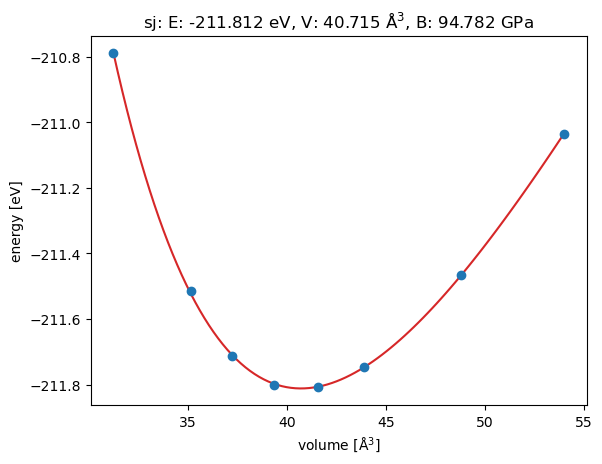

In [6]:
eos.plot()

In [8]:
a = 5.46
atoms = Atoms(symbols=['Si', 'Si'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])

kpoints = monkhorst_pack([4, 4, 4])
        
atoms.calc = Fireball(charges='mdp',kpts=kpoints)
atoms.get_potential_energy()
atoms.get_charges()

print(atoms.calc.results['energy'])
print(atoms.calc.results['shell_charges'])

-211.81689345075966
[[1.3963999  2.47211926 0.13149041]
 [1.39639524 2.47208974 0.13150545]]
